Задача 1.

In [1]:
import time
import matplotlib.pyplot as plt
import random

def tribonacci_number_recursive(n):
    if n == 1 or n == 2:
        return 0
    if n == 3:
        return 1
    return tribonacci_number_recursive(n - 1) + tribonacci_number_recursive(n - 2) + tribonacci_number_recursive(n - 3)

tribonacci_numbers_cache = [0, 0, 1]
for i in range(3, 100):
    tribonacci_numbers_cache.append(tribonacci_numbers_cache[i - 1] + tribonacci_numbers_cache[i - 2] + tribonacci_numbers_cache[i - 3])

def calculate_time(function, numbers):
    times = []
    results = []
    for number in numbers:
        start_time = time.time()
        result = function(number)
        end_time = time.time()
        times.append(end_time - start_time)
        results.append(result)
    return results, times

queries = [1, 3, 9, 27]

recursive_results, recursive_time = calculate_time(tribonacci_number_recursive, queries)
cache_results, cache_time = calculate_time(lambda n: tribonacci_numbers_cache[n - 1], queries)


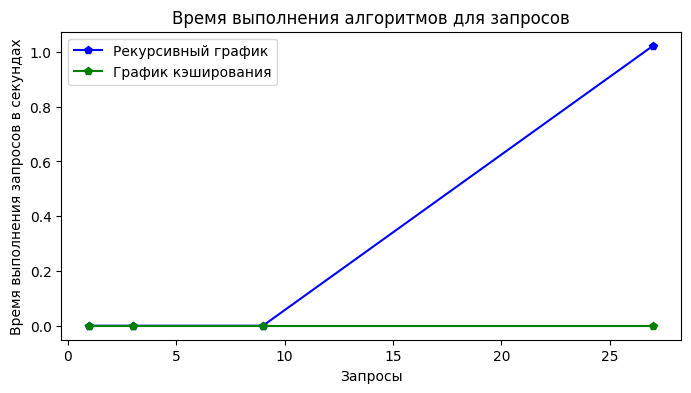

In [2]:
plt.figure(figsize=(8, 4))
plt.plot(queries, recursive_time, label="Рекурсивный график", marker='p', color='blue')
plt.plot(queries, cache_time, label="График кэширования", marker='p', color='green')
plt.xlabel("Запросы")
plt.ylabel("Время выполнения запросов в секундах")
plt.legend()
plt.title("Время выполнения алгоритмов для запросов")
plt.show()

По графикам видно, что запросы с кэшированием выполняются намного быстрее запросов с рекурсией.

Задание 2.

In [3]:
def maxSubArray(nums):
    arrayOfSums = [nums[0]]
    maxSum = nums[0]
    maxPosition = 0
    
    for i in range(1, len(nums)):
        if arrayOfSums[i - 1] > 0:
            arrayOfSums.append(arrayOfSums[i - 1] + nums[i])
        else:
            arrayOfSums.append(nums[i])
        
        if arrayOfSums[i] > maxSum:
            maxSum = arrayOfSums[i]
            maxPosition = i
    
    if maxSum < 0:
        return nums[maxPosition]
    
    endOfMaxSubarray = maxPosition
    startOfMaxSubarray = endOfMaxSubarray
    
    while startOfMaxSubarray >= 0 and arrayOfSums[startOfMaxSubarray] >= 0:
        startOfMaxSubarray -= 1

    return nums[startOfMaxSubarray + 1:endOfMaxSubarray + 1]


In [4]:
import numpy as np
np.random.seed(0)  
random_array = np.random.randint(-20, 20, 10)
random_array


array([-20, -17, -17,  19, -11,  -1,   1,  16,   3, -14])

In [5]:
max_subarray = maxSubArray(random_array)
max_subarray

array([ 19, -11,  -1,   1,  16,   3])

In [6]:
def SubarraySums(nums):
    subarray_sums = []

    for i in range(len(nums)):
        current_sum = 0
        for j in range(i, len(nums)):
            current_sum += nums[j]
            if current_sum >= 0:
                subarray_sums.append(current_sum)
    
    return subarray_sums

subarray_sums=SubarraySums(random_array)
subarray_sums

[2,
 7,
 10,
 19,
 8,
 7,
 8,
 24,
 27,
 13,
 5,
 8,
 0,
 16,
 19,
 5,
 1,
 17,
 20,
 6,
 16,
 19,
 5,
 3]

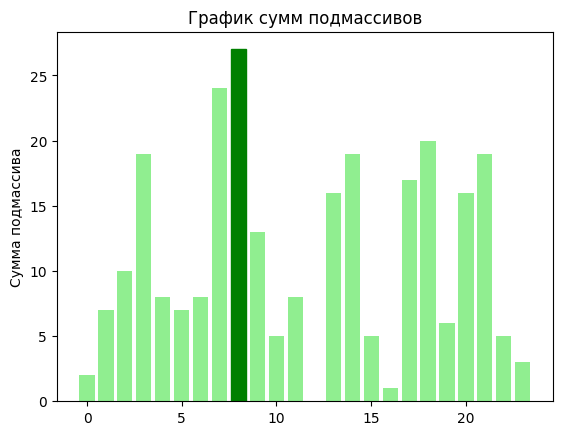

In [7]:
indices = np.arange(len(subarray_sums))
bars = plt.bar(indices, subarray_sums, color='lightgreen')
plt.ylabel('Сумма подмассива')
plt.title('График сумм подмассивов')

for i in range(len(subarray_sums)):
    if subarray_sums[i] == max(subarray_sums):
        bars[i].set_color('green')

plt.show()

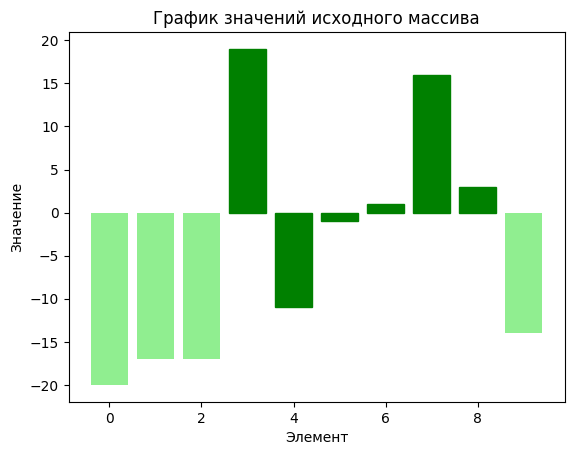

In [8]:
indices = np.arange(len(random_array))

bars = plt.bar(indices, random_array, color='lightgreen')
plt.xlabel('Элемент')
plt.ylabel('Значение')
plt.title('График значений исходного массива')

for i in range(len(random_array)):
    if random_array[i] in max_subarray:
        bars[i].set_color('green')

plt.show()